## Observations and Insights 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mice_df = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')

# Display the data table for preview
merged_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Checking the number of mice
unique_number_mice = merged_mice_df["Mouse ID"].nunique()
print(f"There are {unique_number_mice} mice")

There are 249 mice


In [49]:
# Checking for duplicate mice based on Mouse ID and timepoint
duplicate_mice = merged_mice_df.loc[merged_mice_df.duplicated(subset=["Mouse ID", "Timepoint"]), :]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [50]:
# Getting the mouse ID that is associated with the duplicate values
mouse_ID_to_remove = duplicate_mice["Mouse ID"].unique()
mouse_ID_to_remove.item()

'g989'

In [51]:
# Removing the duplicate rows based on 'Mouse ID' and 'Timepoint' and keeping the latest entry only
clean_merged_mice_df = merged_mice_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = 'last').reset_index(drop=True)
clean_merged_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Checking the number of mice in the clean DataFrame.
unique_number_mice = clean_merged_mice_df["Mouse ID"].nunique()
print(f"There are {unique_number_mice} mice")

There are 249 mice


## Summary Statistics

In [53]:
# Calculating the mean tumour volume for each drug regimen
mean_tumour_volume = clean_merged_mice_df.groupby(["Drug Regimen"]).mean()["Tumour Volume (mm3)"]

# Calculating the median tumour volume for each drug regimen
median_tumour_volume = clean_merged_mice_df.groupby(["Drug Regimen"]).median()["Tumour Volume (mm3)"]

# Calculating the variance in tumour volume for each drug regimen
variance_tumour_volume = clean_merged_mice_df.groupby(["Drug Regimen"]).var()["Tumour Volume (mm3)"]

# Calculating the standard deviation
std_tumour_volume = clean_merged_mice_df.groupby(["Drug Regimen"]).std()["Tumour Volume (mm3)"]

# Calculating the SEM
sem_tumour_volume = clean_merged_mice_df.groupby(["Drug Regimen"]).sem()["Tumour Volume (mm3)"]

In [54]:
tumour_volume_summary_stats = pd.DataFrame({ "Mean tumour volume": mean_tumour_volume, 
                                        "Median tumour volume" : median_tumour_volume, 
                                        "Variance" : variance_tumour_volume, 
                                        "Standard Deviation" : std_tumour_volume, 
                                        "SEM" : sem_tumour_volume})
tumour_volume_summary_stats
tumour_volume_summary_stats.index.name=None
tumour_volume_summary_stats

,Mean tumour volume,Median tumour volume,Variance,Standard Deviation,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

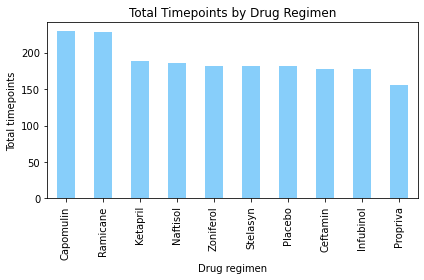

In [55]:
# Generate a bar chart showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Calculating the total number of timepoints for each durg regime
drug_counts = clean_merged_mice_df["Drug Regimen"].value_counts()

# Charting the bar chart
pandas_total_timepoints_chart = drug_counts.plot(kind="bar", title="Total Timepoints by Drug Regimen", color="lightskyblue")
pandas_total_timepoints_chart.set_xlabel("Drug regimen")
pandas_total_timepoints_chart.set_ylabel("Total timepoints")
plt.tight_layout();


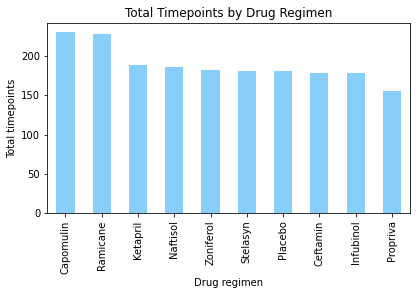

In [56]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = drug_counts.values
x_axis = drug_counts.index.values

plt.figure(figsize=(6.5,3.5))
plt.bar(x_axis, counts, color='lightskyblue', alpha=1, align = "center", width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Drug regimen")
plt.ylabel("Total timepoints")
plt.title("Total Timepoints by Drug Regimen")
plt.xlim(-0.50, len(x_axis)-0.50);

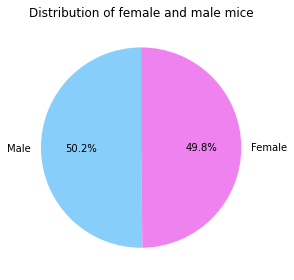

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculating the distribution of female and male mice
sex_distribution = mouse_metadata["Sex"].value_counts()

# Creating the pie plot
sex_distribution.plot(kind="pie", y='sex', autopct="%.1f%%", colors=['lightskyblue', 'violet'], startangle=90, figsize=(5,4), title="Distribution of female and male mice", label="")
plt.tight_layout();


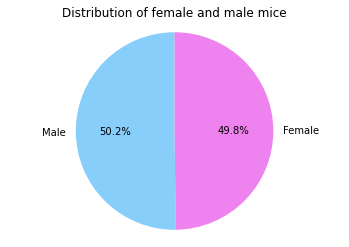

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = sex_distribution.values
sex = sex_distribution.index.values
colors = ["lightskyblue", "violet"]

plt.pie(counts, labels=sex, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of female and male mice")
plt.axis("equal");


## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Finding the final timepoint for each mouse
last_time_point_df = clean_merged_mice_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merging the final timepoint data with the cleaned merged file to bring back the data for each mouse at the relevant timepoint
last_timepoint_merged_data_df = pd.merge(last_time_point_df, clean_merged_mice_df, how='left', on=['Mouse ID', 'Timepoint'])
last_timepoint_merged_data_df = last_timepoint_merged_data_df.reset_index(drop=True)

# Putting treatments into a list for the loop 
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creating an empty list to fill with tumour volume data
tumour_volume_data = []

# Looping through each drug in the treatment list and appending the resulting final tumour volumes to the 'tumour volume data' list.
for drug in treatment_list:
    drug_data = last_timepoint_merged_data_df.loc[last_timepoint_merged_data_df["Drug Regimen"] == drug, "Tumour Volume (mm3)"]
    tumour_volume_data.append(drug_data)
    
    # Using pandas for the quartile calculations
    quartiles = drug_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Printing out the relevant information
    print(f"The lower quartile of {drug} is: {lowerq:.2f}")
    print(f"The upper quartile of {drug} is: {upperq:.2f}")
    print(f"The interquartile range of {drug} is: {iqr:.2f}")
    print(f"The the median of {drug} is: {quartiles[0.5]:.2f} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.")
    print()


The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.10
The the median of Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.

The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.30
The interquartile range of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.



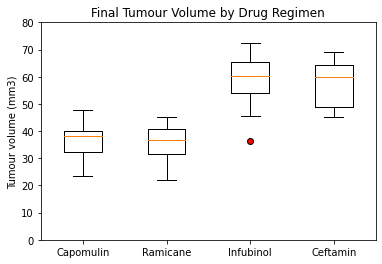

In [60]:
# Box plot of the distrubition of the final tumour volumes for all mice in each of the four drug regimens
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumour Volume by Drug Regimen')
ax1.set_ylabel('Tumour volume (mm3)')
flierprops = dict(markerfacecolor='r')
ax1.boxplot(tumour_volume_data, labels=treatment_list, flierprops=flierprops)
plt.ylim(0, 80)
plt.show()

## Line and Scatter Plots

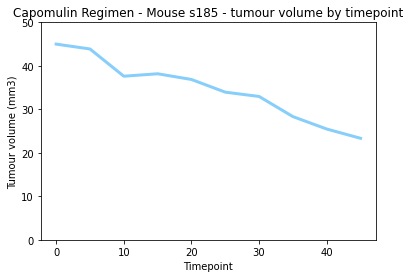

In [61]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

# Selecting the mouse and defining the x and y values
the_chosen_mouse_df = clean_merged_mice_df.loc[clean_merged_mice_df["Mouse ID"] == "s185"]
tumour_volume = the_chosen_mouse_df["Tumour Volume (mm3)"]
timepoint = the_chosen_mouse_df["Timepoint"]

# Charting the line plot
the_chosen_mouse_line_plot, = plt.plot(timepoint, tumour_volume, color="lightskyblue", label="Mouse s185", linewidth=3)
plt.xlabel("Timepoint")
plt.ylabel("Tumour volume (mm3)")
plt.title("Capomulin Regimen - Mouse s185 - tumour volume by timepoint")
plt.ylim([0, 50]);

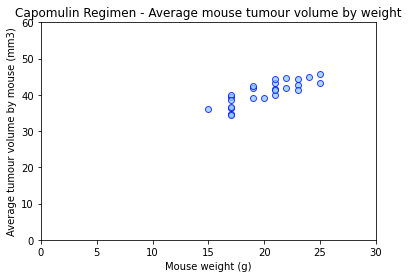

<Figure size 7200x7200 with 0 Axes>

In [62]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

# Selecting the mice on the Capomulin regimen
capomulin_regimen = clean_merged_mice_df.loc[clean_merged_mice_df["Drug Regimen"] == "Capomulin", :]

# Calculating the average tumour volume for each mouse, getting their weight, and renaming the column
average_tumour_volume = capomulin_regimen.groupby(["Mouse ID"]).mean()[["Tumour Volume (mm3)", "Weight (g)"]]
average_tumour_volume = average_tumour_volume.rename(columns={"Tumour Volume (mm3)" : "Average Tumour Volume (mm3)"})

# Charting the scatter plot
x_axis = average_tumour_volume["Weight (g)"]
data = average_tumour_volume["Average Tumour Volume (mm3)"]
plt.scatter(x_axis, data, marker="o", facecolors="lightskyblue", edgecolors="blue", alpha=0.75)
plt.ylim(0, 60)
plt.xlim(0, 30)
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average tumour volume by mouse (mm3)")
plt.title("Capomulin Regimen - Average mouse tumour volume by weight")
plt.figure(figsize=(100,100));

## Correlation and Regression

In [63]:
# Calculating the correlation coefficent for mouse weight and average tumour volume for the Capomulin regimen
tumour_volume = average_tumour_volume["Average Tumour Volume (mm3)"]
weight = average_tumour_volume["Weight (g)"]
correlation = st.pearsonr(tumour_volume, weight)
print(f"The correlation between mouse weight and average tumour volume for the Capomulin regimen is {round(correlation[0],2)}")


The correlation between mouse weight and average tumour volume for the Capomulin regimen is 0.84


The r-squared is: 0.708857


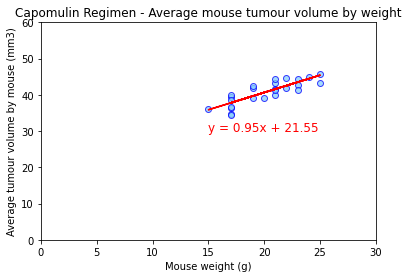

In [64]:
# Calcuating the linear regression model for mouse weight and average tumour volume for the Capomulin regimen
from scipy.stats import linregress
x_values = average_tumour_volume["Weight (g)"]
y_values = average_tumour_volume["Average Tumour Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2:.6f}")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values, y_values)
plt.scatter(x_axis, y_values, marker="o", facecolors="lightskyblue", edgecolors="blue", alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,30),fontsize=12,color="red")
plt.xlabel('Mouse weight (g)')
plt.ylabel('Average tumour volume by mouse (mm3)')
plt.title("Capomulin Regimen - Average mouse tumour volume by weight")
plt.xlim(0, 30)
plt.ylim(0,60)
plt.show()

